<a href="https://www.kaggle.com/code/kusumakar/salary-eda?scriptVersionId=203500240" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datascience-salaries-2024/DataScience_salaries_2024.csv


In [2]:
df=pd.read_csv("/kaggle/input/datascience-salaries-2024/DataScience_salaries_2024.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [4]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

df.head()

In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [7]:
df.drop(columns=['job_title','salary','salary_currency'],inplace=True)

In [8]:
df

,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,40038,CL,100,CL,L
1,2021,MI,FT,36259,HU,50,US,L
2,2020,MI,FT,35735,HU,50,HU,L
3,2021,MI,FT,77364,JP,50,JP,S
4,2022,SE,FT,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,15000,GH,100,GH,M
14834,2020,EX,FT,15000,NG,0,CA,M
14835,2021,EN,FT,15000,TH,100,TH,L
14836,2022,EN,FT,15000,ID,0,ID,L


In [9]:
categorical = list(df.select_dtypes(include=['object']).columns)
numerical  = list(df.select_dtypes(include=['int64']).columns)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='work_year', ylabel='salary_in_usd'>

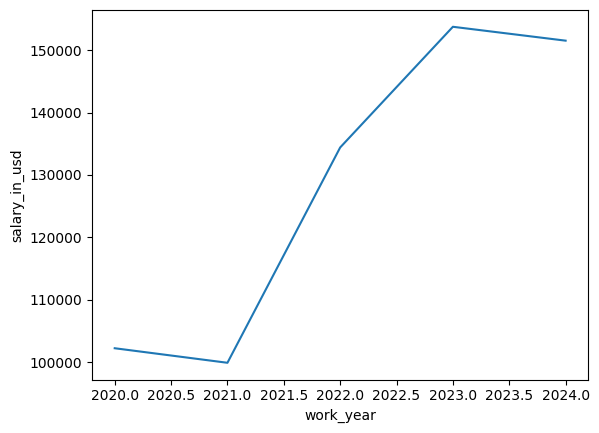

In [11]:
df1=df.groupby('work_year').agg({"salary_in_usd":"mean"}).reset_index()
sns.lineplot(x='work_year',y='salary_in_usd',data=df1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

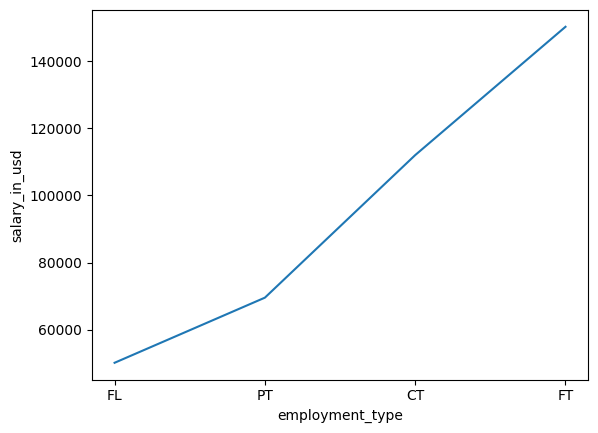

In [12]:
df1=df.groupby('employment_type').agg({"salary_in_usd":"mean"}).reset_index().sort_values(by='salary_in_usd')
sns.lineplot(x='employment_type',y='salary_in_usd',data=df1)

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

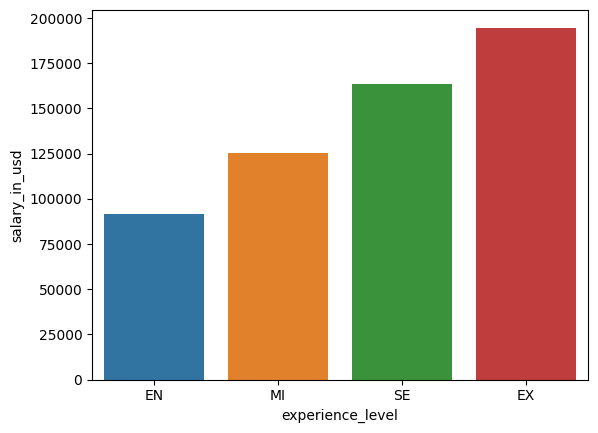

In [13]:
df1=df.groupby('experience_level').agg({"salary_in_usd":"mean"}).reset_index().sort_values(by='salary_in_usd')
sns.barplot(x='experience_level',y='salary_in_usd',data=df1)

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

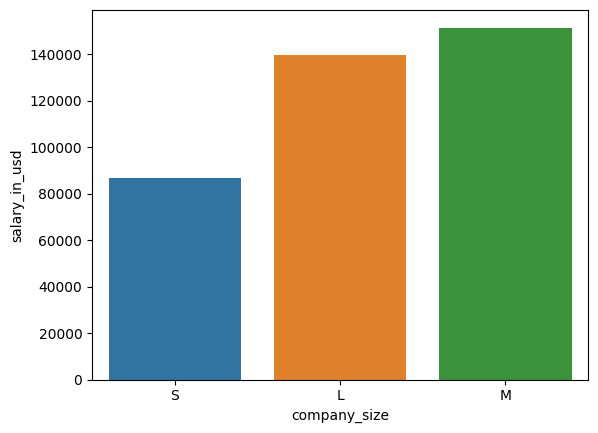

In [14]:
df1=df.groupby('company_size').agg({"salary_in_usd":"mean"}).reset_index().sort_values(by='salary_in_usd')
sns.barplot(x='company_size',y='salary_in_usd',data=df1)

<Axes: xlabel='company_location', ylabel='salary_in_usd'>

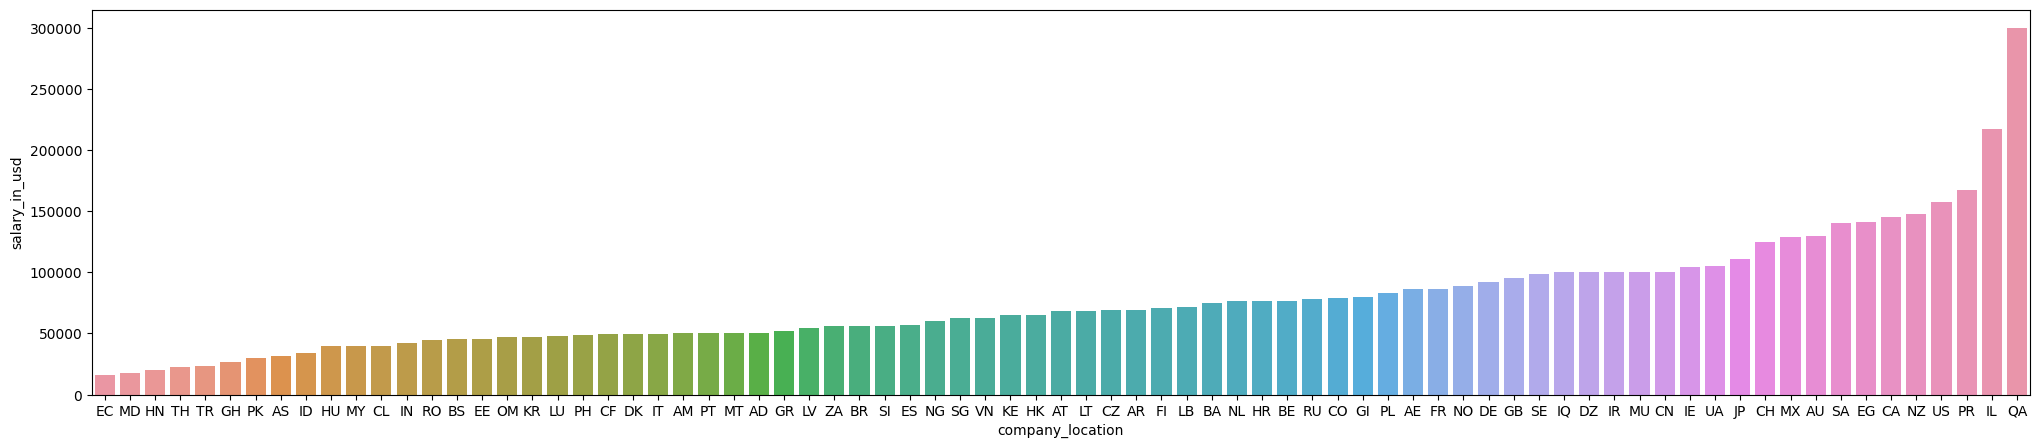

In [15]:
df1=df.groupby('company_location').agg({"salary_in_usd":"mean"}).reset_index().sort_values(by='salary_in_usd')
plt.figure(figsize=(25,5))
sns.barplot(x='company_location',y='salary_in_usd',data=df1)

<Axes: xlabel='employee_residence', ylabel='salary_in_usd'>

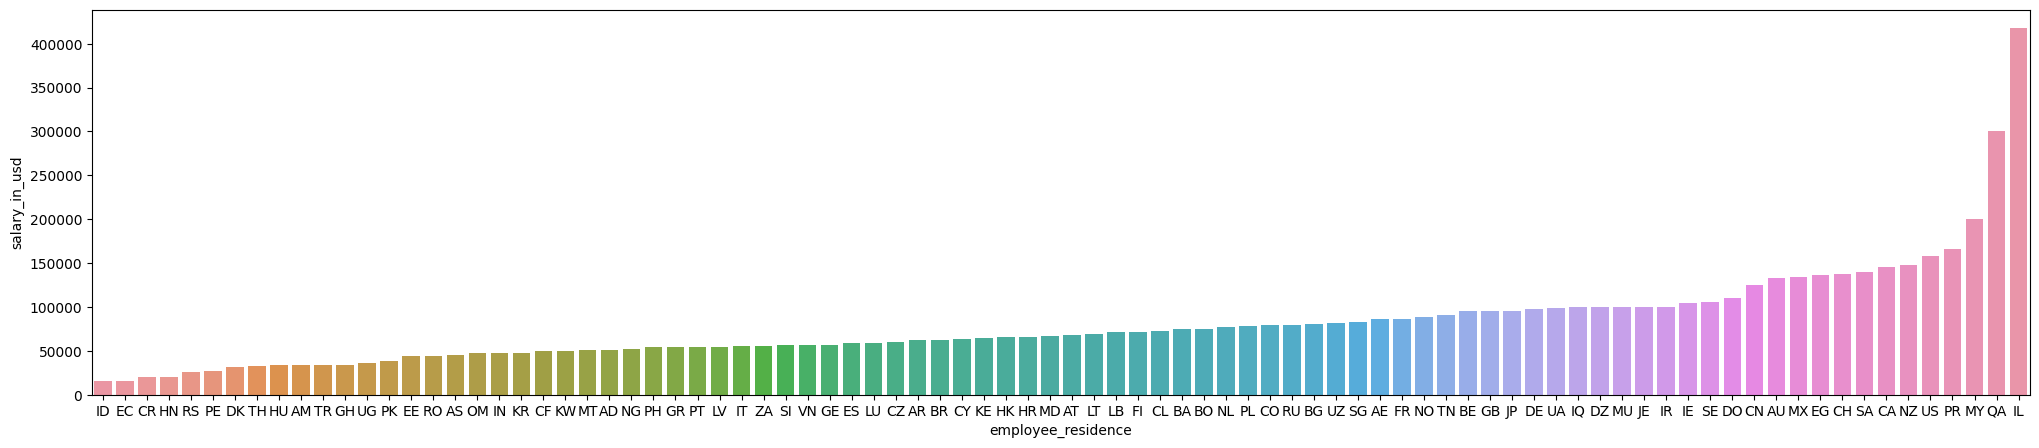

In [16]:
df1=df.groupby('employee_residence').agg({"salary_in_usd":"mean"}).reset_index().sort_values(by='salary_in_usd')
plt.figure(figsize=(25,5))
sns.barplot(x='employee_residence',y='salary_in_usd',data=df1)

In [17]:
df.drop(columns=['employee_residence'],inplace=True)

In [18]:
df

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_location,company_size
0,2021,MI,FT,40038,100,CL,L
1,2021,MI,FT,36259,50,US,L
2,2020,MI,FT,35735,50,HU,L
3,2021,MI,FT,77364,50,JP,S
4,2022,SE,FT,95386,50,IN,L
...,...,...,...,...,...,...,...
14833,2022,MI,FT,15000,100,GH,M
14834,2020,EX,FT,15000,0,CA,M
14835,2021,EN,FT,15000,100,TH,L
14836,2022,EN,FT,15000,0,ID,L


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

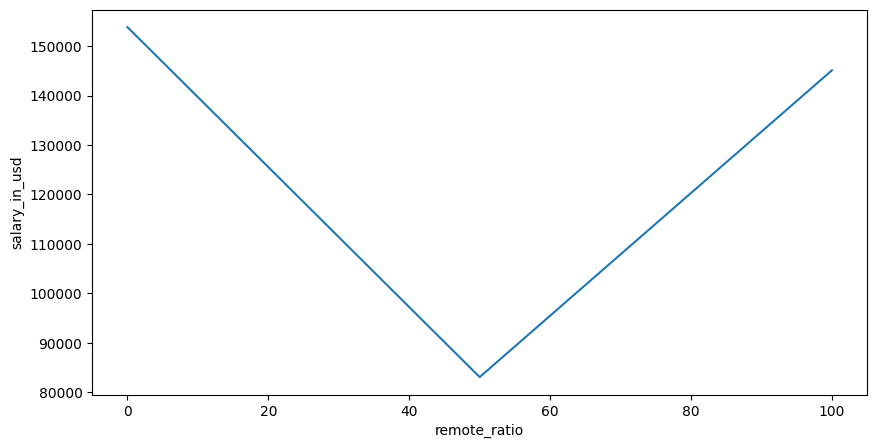

In [19]:
df1=df.groupby('remote_ratio').agg({"salary_in_usd":"mean"}).reset_index().sort_values(by='salary_in_usd')
plt.figure(figsize=(10,5))
sns.lineplot(x='remote_ratio',y='salary_in_usd',data=df1)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

<Axes: >

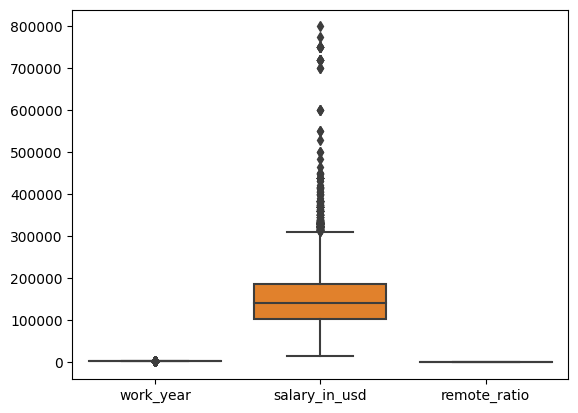

In [21]:
sns.boxplot(df)

In [22]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
clean_df = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]


<Axes: >

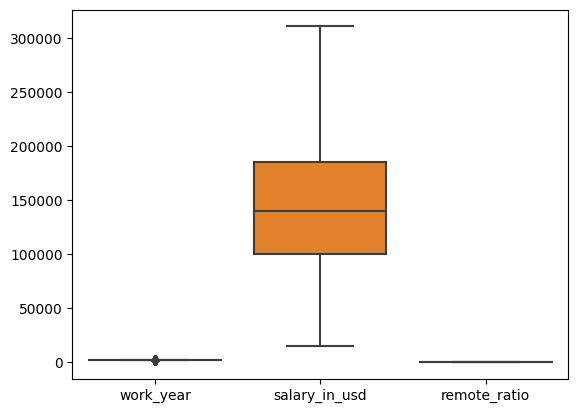

In [23]:
sns.boxplot(clean_df)

In [24]:
clean_df.columns

Index(['work_year', 'experience_level', 'employment_type', 'salary_in_usd',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [25]:
X = clean_df.drop(columns=['salary_in_usd'])
Y = clean_df['salary_in_usd']


In [26]:
X=pd.concat([X,pd.get_dummies(X['company_location'])],axis=1).drop(columns=['company_location'])

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [28]:
employment_type_encoder = OrdinalEncoder(categories=[['FL','PT','CT','FT']])
company_size_encoder = OrdinalEncoder(categories = [['S','M','L']])
experience_level_encoder = OrdinalEncoder(categories = [['EN','MI','SE','EX']])
X_train['employment_type']=employment_type_encoder.fit_transform(X_train[['employment_type']])
X_train['company_size']=company_size_encoder.fit_transform(X_train[['company_size']])
X_train['experience_level']=experience_level_encoder.fit_transform(X_train[['experience_level']])
X_test['employment_type']=employment_type_encoder.transform(X_test[['employment_type']])
X_test['company_size']=company_size_encoder.transform(X_test[['company_size']])
X_test['experience_level']=experience_level_encoder.transform(X_test[['experience_level']])


In [29]:
transformer = ColumnTransformer(
[
    ("Standardize",StandardScaler(),["work_year","remote_ratio"])

],remainder='passthrough')

X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)


In [30]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
models = {"Random Forest Regressor":RandomForestRegressor(),
         "Decision Tree Regressor":DecisionTreeRegressor(),
         "Linear Regressor":LinearRegression(),
         "XGBoost Regression":XGBRegressor(),
         "Lasso":Lasso(alpha=1),
         "Ridge":Ridge()}

In [31]:
r2_scores=[]
mean_squared = []
mean_absolute = []
model_list =[]
for model_name,model in models.items():
    model.fit(X_train_transformed,y_train)
    ypred = model.predict(X_test_transformed)
    r2_scores.append(r2_score(y_test,ypred))
    mean_squared.append(mean_squared_error(y_test,ypred))
    mean_absolute.append(mean_absolute_error(y_test,ypred))
    model_list.append(model_name)
    

In [32]:
accuracy_data = pd.DataFrame()
accuracy_data['Model ']=model_list
accuracy_data['R2 Score']=r2_scores

accuracy_data

,Model,R2 Score
0,Random Forest Regressor,2.799719e-01
1,Decision Tree Regressor,2.662867e-01
2,Linear Regressor,-9.719169e+18
3,XGBoost Regression,2.818491e-01
4,Lasso,2.678611e-01
5,Ridge,2.682062e-01


In [33]:
from sklearn.decomposition import PCA

# Convert data to pandas DataFrame for convenience

# Initialize PCA with the number of components you want (e.g., 1 or 2)
pca = PCA(n_components=5)

# Fit and transform the data
data_reduced = pca.fit_transform(X_train_transformed)
data_reduced_test=pca.transform(X_test_transformed)


In [34]:
r2_scores=[]
mean_squared = []
mean_absolute = []
model_list =[]
for model_name,model in models.items():
    model.fit(data_reduced,y_train)
    ypred = model.predict(data_reduced_test)
    r2_scores.append(r2_score(y_test,ypred))
    mean_squared.append(mean_squared_error(y_test,ypred))
    mean_absolute.append(mean_absolute_error(y_test,ypred))
    model_list.append(model_name)
    

In [35]:
accuracy_data = pd.DataFrame()
accuracy_data['Model ']=model_list
accuracy_data['R2 Score']=r2_scores



In [36]:
accuracy_data

,Model,R2 Score
0,Random Forest Regressor,0.276755
1,Decision Tree Regressor,0.262427
2,Linear Regressor,0.236609
3,XGBoost Regression,0.266667
4,Lasso,0.236608
5,Ridge,0.236604
